In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import linear_model

In [2]:
df = pd.read_csv("../traces/benchmarks/20230226_5_first_benchmarks.csv")

# While language

_awaiting results_

In [3]:
# While 200 runs
df_while = pd.read_csv("../traces/benchmarks/2023_3_2_new_experiments_list_map_2_and_while.csv")
df_while = df_while[df_while['benchmark_name'].str.startswith("while")]

In [4]:
df_while["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]

In [5]:
df_while

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
18,while_fib_program_100_staged,0.946560,2.650830e+09,-1.879455e+08,1.613299e+08,1.0,4.564599e+08,-1.788139e-07,1.192093e-06,1.000000,...,0.080552,0.999807,87.876654,-1.203402e-01,1.715838e-01,NaN,0.0,0.0,0.0,100
19,while_fib_program_50_staged,0.951985,1.300700e+09,-9.232553e+07,7.025345e+07,1.0,2.270494e+08,-8.940697e-08,5.662441e-07,0.999999,...,0.053546,0.999971,48.885992,-6.883796e-02,6.945802e-02,NaN,0.0,0.0,0.0,50
20,while_fib_program_20_staged,0.908569,4.741048e+08,-4.486895e+07,3.937748e+07,1.0,8.945276e+07,-2.980232e-08,2.384186e-07,0.999988,...,0.017192,0.999984,19.485214,-1.516491e-02,1.578082e-02,NaN,0.0,0.0,0.0,20
21,while_fib_program_10_staged,0.817334,2.390311e+08,-2.928796e+07,3.302417e+07,1.0,4.360329e+07,-1.490116e-08,1.192093e-07,0.999998,...,0.023565,0.999885,9.591440,-2.422164e-02,2.828605e-02,NaN,0.0,0.0,0.0,10
22,while_fib_program_5_staged,0.961469,1.459658e+08,-9.734951e+06,6.612807e+06,1.0,2.068248e+07,-7.450581e-09,5.215406e-08,0.999998,...,0.016043,1.000000,5.000000,-8.881784e-16,2.664535e-15,NaN,0.0,0.0,0.0,5
23,while_fib_program_2_staged,0.727034,3.061581e+07,-8.199495e+06,5.485333e+06,1.0,6.932129e+06,-3.725290e-09,1.676381e-08,0.999999,...,0.018944,0.997038,1.706615,-1.981181e-02,2.047279e-02,NaN,0.0,0.0,0.0,2
24,while_fib_program_1_staged,0.416793,4.895292e+06,-1.120477e+06,1.504804e+06,1.0,1.160801e+06,-2.328306e-10,3.259629e-09,0.999962,...,0.017720,0.949343,0.272763,-1.441169e-02,1.496299e-02,NaN,0.0,0.0,0.0,1
25,while_fib_program_compile,0.939837,2.896084e+08,-2.071593e+07,1.876702e+07,1.0,4.844803e+07,-2.235174e-08,1.117587e-07,1.000000,...,0.038352,0.999769,13.512062,-5.289607e-02,5.977274e-02,NaN,0.0,0.0,0.0,0
26,while_fib_program_100_run,0.917971,1.029726e+10,-8.203083e+08,1.131416e+09,1.0,2.285558e+09,-9.536743e-07,5.722046e-06,1.000000,...,0.185634,0.999960,599.806615,-2.871957e-01,3.495314e-01,NaN,0.0,0.0,0.0,100
27,while_fib_program_50_run,0.988337,4.717737e+09,-8.334741e+07,1.351282e+08,1.0,1.138226e+09,-7.152557e-07,2.622604e-06,1.000000,...,0.169142,0.999984,327.526459,-3.505933e-01,3.350334e-01,NaN,0.0,0.0,0.0,50


In [6]:
def plot_one(ax, to_plot, color, ecolor, fill_color, label, fmt="x--", fill_between=True, metric='time_per_run'):
    y_col = metric + '_mean'
    lo_err_col = metric + '_abs_lo_diff'
    hi_err_col = metric + '_abs_hi_diff'
    x = to_plot['bench_x']
    y = to_plot[y_col]
    lo_err = to_plot[lo_err_col]
    hi_err = to_plot[hi_err_col]
    error = [-lo_err, hi_err]
    if fill_between:
        ax.fill_between(x, y + lo_err, y + hi_err, color=fill_color)
    ax.errorbar(x, y, yerr=error, fmt=fmt, color=color, ecolor=ecolor, label=label)

def plot_info_for_axs(df, title, axs, linreg = True, log_scale=False, has_compile=True):
    # Setup
    # Assumes existence of bench_x column
    # fig, axs = plt.subplots(3, 1, figsize=(15, 20))

    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input x")
    axs[0].set_ylabel("Runtime (ns)")
    if log_scale:
        axs[0].set_yscale('log', nonposy='clip')
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title(f"{title}: Time/run")

    # Ratio

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input x")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(f"{title}: Ratio of speedup: $t(p, x)/t_p(x)$")

    # Compile + run VS just run
    if has_compile:
        peval = df[df['benchmark_name'].str.endswith('compile')][['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']].iloc[0]
        new_staged = (peval + staged).append(peval)
        new_run = run # pd.concat([run, pd.DataFrame([[0, 0, 0, 0]], columns=['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff'])]) 

        if linreg:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.', fill_between=False)

            model_staged = linear_model.LinearRegression()
            model_staged.fit(np.array(new_staged['bench_x']).reshape(-1, 1), new_staged['time_per_run_mean'])
            model_run = linear_model.LinearRegression()
            model_run.fit(np.array(new_run['bench_x']).reshape(-1, 1), new_run['time_per_run_mean'])

            X = np.linspace(0, 100).reshape(-1, 1)
            y_staged = model_staged.predict(X)
            y_run = model_run.predict(X)
            axs[2].plot(X, y_staged, "-", color="cyan", label="Linear model for the combined run time of the staged version")
            axs[2].plot(X, y_run, "-", color="#f7b713", label="Linear model for the run time of the non staged version")

            x_intersection = (model_run.intercept_-model_staged.intercept_) / (model_staged.coef_[0] - model_run.coef_[0])
            y_intersection = model_staged.predict([[x_intersection]])[0]
            axs[2].plot(x_intersection, y_intersection, "o", color="red", label="intersection")
            axs[2].annotate(str((round(x_intersection, 2), round(y_intersection, 2))), xy=(x_intersection, y_intersection))
        else:
            plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.--', fill_between=False)
            plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.--', fill_between=False)
        axs[2].legend()
        axs[2].set_xlabel("Dynamic Input x")
        axs[2].set_ylabel("Runtime (ns)")
        axs[2].set_title(f"{title}: Time/run: Interpreted VS Compilation + Eval")

    # plt.show()

def plot_info_for(df, title, linreg=True, log_scale=False, has_compile=True):
    fig, axs = plt.subplots(3, 1, figsize=(15, 20))
    plot_info_for_axs(df, title, axs, linreg, log_scale=log_scale, has_compile=has_compile)
    plt.show()


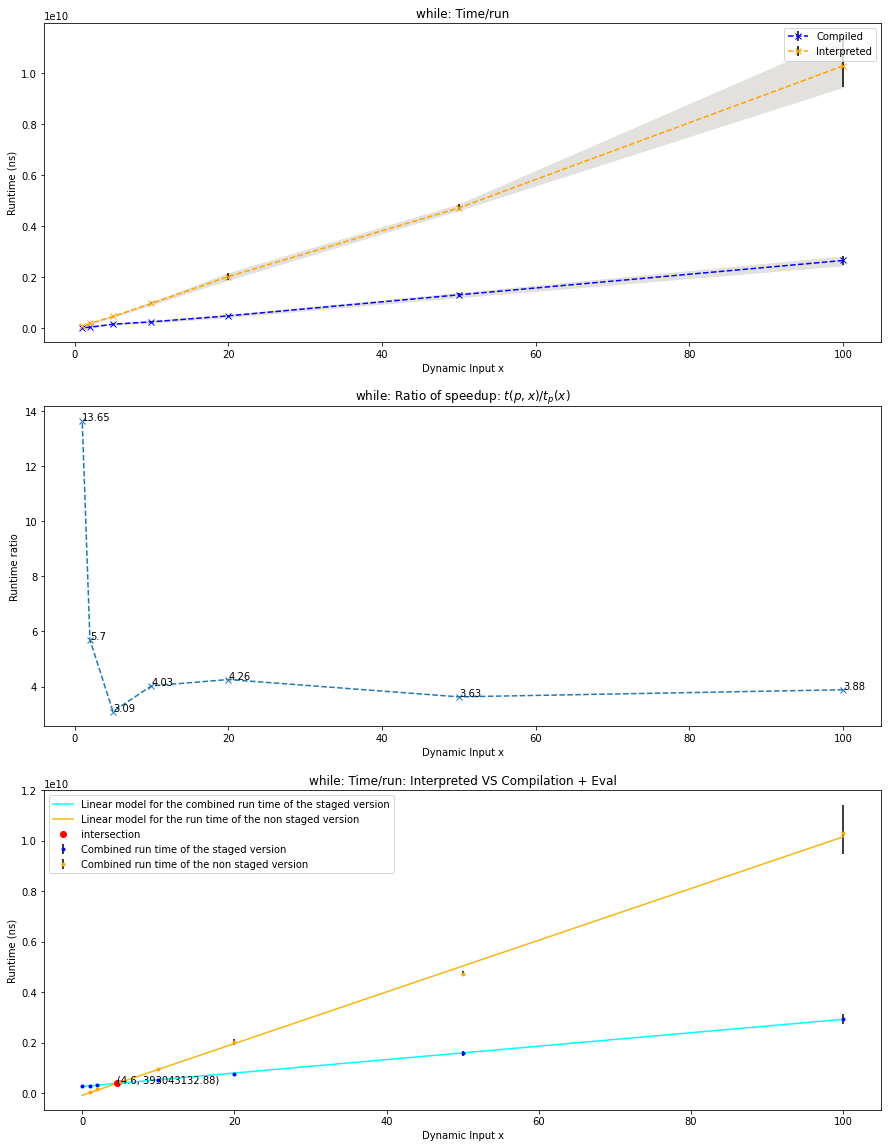

In [7]:
plot_info_for(df_while, "while")

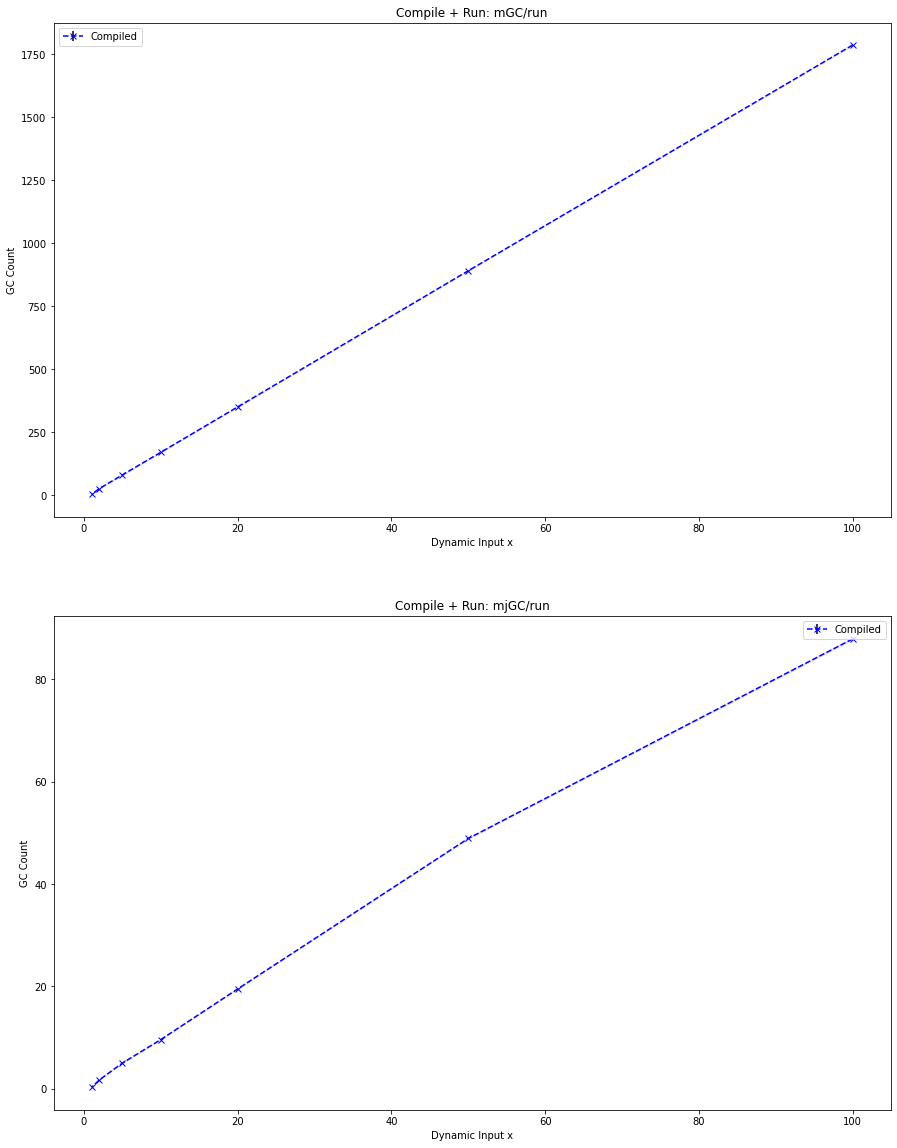

In [23]:
def plot_gc(df):
    fig, axs = plt.subplots(2, 1, figsize=(15, 20))
    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff', 'mGC_per_run_mean', 'mGC_per_run_abs_lo_diff', 'mGC_per_run_abs_hi_diff', 'mjGC_per_run_mean', 'mjGC_per_run_abs_lo_diff', 'mjGC_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff', 'mGC_per_run_mean', 'mGC_per_run_abs_lo_diff', 'mGC_per_run_abs_hi_diff', 'mjGC_per_run_mean', 'mjGC_per_run_abs_lo_diff', 'mjGC_per_run_abs_hi_diff']]

    # Garbage collection

    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled", metric="mGC_per_run")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input x")
    axs[0].set_ylabel("GC Count")
    # axs[0].set_yscale('log', nonposy='clip')
    axs[0].set_title("Compile + Run: mGC/run")

    plot_one(axs[1], staged, "blue", "black", "#e3e1de", "Compiled", metric="mjGC_per_run")
    axs[1].legend()
    axs[1].set_xlabel("Dynamic Input x")
    axs[1].set_ylabel("GC Count")
    # axs[0].set_yscale('log', nonposy='clip')
    axs[1].set_title("Compile + Run: mjGC/run")

    plt.show()
plot_gc(df_while)

## Interpretation

Got some really nice results here. `fib x` happens to be linear wrt $x$, so two lines is indeed what we get.
Clearly the speedup ration converges to around 5.

# Pow and Pow amortised

## Pow

In [9]:
# Pow 10000 runs
df = pd.read_csv("../traces/benchmarks/2023_3_1_new_experiments_pow_only.csv")

In [10]:
df

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
0,pow_10_8192_staged,0.866444,2.724602e+04,-1235.122025,1234.923686,1.0,12880.0,-4.911271e-11,1.637090e-11,0.865951,...,-0.000882,0.000811,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
1,pow_10_4096_staged,0.876886,3.194006e+04,-1091.287546,1191.382085,1.0,12880.0,-5.093170e-11,1.637090e-11,0.865951,...,-0.000890,0.000826,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
2,pow_10_2048_staged,0.678999,4.309250e+04,-3939.389461,4076.376436,1.0,12880.0,-5.093170e-11,1.637090e-11,0.865951,...,-0.000842,0.000821,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
3,pow_10_1024_staged,0.911317,2.842341e+04,-961.121845,957.291078,1.0,12880.0,-4.911271e-11,1.637090e-11,0.865951,...,-0.000874,0.000877,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
4,pow_10_512_staged,0.780213,4.072060e+04,-2447.376991,2604.146955,1.0,12538.0,-4.547474e-11,2.000888e-11,0.822015,...,-0.000820,0.000821,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
5,pow_10_256_staged,0.874129,3.994323e+04,-1416.242353,1498.718313,1.0,12538.0,-4.547474e-11,2.000888e-11,0.822015,...,-0.000816,0.000819,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
6,pow_10_128_staged,0.845450,2.846088e+04,-1123.919081,1293.301919,1.0,12538.0,-4.729372e-11,2.000888e-11,0.822015,...,-0.000849,0.000846,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
7,pow_10_64_staged,0.733786,2.708843e+04,-2388.027359,2410.980909,1.0,12528.0,-5.456968e-11,1.091394e-11,0.863864,...,-0.000827,0.000880,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
8,pow_10_32_staged,0.972374,1.642290e+04,-276.124657,343.905690,1.0,12528.0,-5.456968e-11,1.273293e-11,0.863864,...,-0.000829,0.000871,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
9,pow_10_16_staged,0.964355,1.670103e+04,-243.796279,289.328228,1.0,12528.0,-5.456968e-11,9.094947e-12,0.863864,...,-0.000829,0.000830,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0


In [11]:
df['bench_x']= [i for i in range(13, -1, -1)] + [0] + [i for i in range(13, -1, -1)]

/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


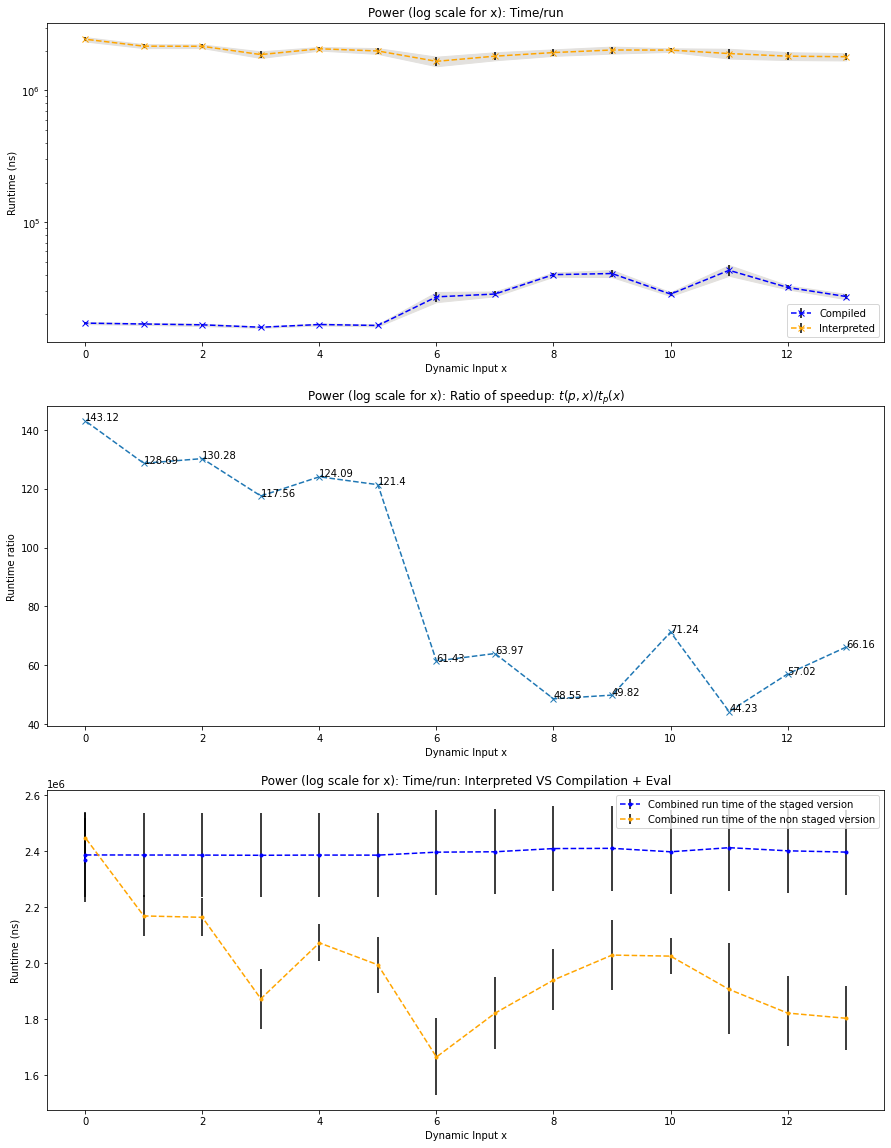

In [12]:
plot_info_for(df, "Power (log scale for x)", linreg=False, log_scale=True)

In [13]:
pd.set_option('display.max_columns', None)
df

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,mjWd_per_run_mean,mjWd_per_run_abs_lo_diff,mjWd_per_run_abs_hi_diff,promotions_per_run_r2,promotions_per_run_mean,promotions_per_run_abs_lo_diff,promotions_per_run_abs_hi_diff,mGC_per_run_r2,mGC_per_run_mean,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,pow_10_8192_staged,0.866444,2.724602e+04,-1235.122025,1234.923686,1.0,12880.0,-4.911271e-11,1.637090e-11,0.865951,23.375880,-1.543140,1.437901,0.865951,23.375880,-1.427040,1.497368,0.961467,0.049148,-0.000882,0.000811,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,13
1,pow_10_4096_staged,0.876886,3.194006e+04,-1091.287546,1191.382085,1.0,12880.0,-5.093170e-11,1.637090e-11,0.865951,23.375880,-1.529941,1.418380,0.865951,23.375880,-1.503858,1.421164,0.961467,0.049148,-0.000890,0.000826,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,12
2,pow_10_2048_staged,0.678999,4.309250e+04,-3939.389461,4076.376436,1.0,12880.0,-5.093170e-11,1.637090e-11,0.865951,23.375880,-1.463714,1.529897,0.865951,23.375880,-1.452413,1.502300,0.961467,0.049148,-0.000842,0.000821,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,11
3,pow_10_1024_staged,0.911317,2.842341e+04,-961.121845,957.291078,1.0,12880.0,-4.911271e-11,1.637090e-11,0.865951,23.375880,-1.502607,1.390919,0.865951,23.375880,-1.475557,1.516808,0.961467,0.049148,-0.000874,0.000877,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,10
4,pow_10_512_staged,0.780213,4.072060e+04,-2447.376991,2604.146955,1.0,12538.0,-4.547474e-11,2.000888e-11,0.822015,23.424080,-1.929978,1.846184,0.822015,23.424080,-1.952007,1.864988,0.961082,0.047855,-0.000820,0.000821,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,9
5,pow_10_256_staged,0.874129,3.994323e+04,-1416.242353,1498.718313,1.0,12538.0,-4.547474e-11,2.000888e-11,0.822015,23.424080,-1.848380,1.884795,0.822015,23.424080,-1.965635,1.917351,0.961082,0.047855,-0.000816,0.000819,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,8
6,pow_10_128_staged,0.845450,2.846088e+04,-1123.919081,1293.301919,1.0,12538.0,-4.729372e-11,2.000888e-11,0.822015,23.424080,-1.916976,1.911812,0.822015,23.424080,-1.836038,1.919238,0.961082,0.047855,-0.000849,0.000846,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,7
7,pow_10_64_staged,0.733786,2.708843e+04,-2388.027359,2410.980909,1.0,12528.0,-5.456968e-11,1.091394e-11,0.863864,22.361637,-1.189363,1.193559,0.863864,22.361637,-1.280350,1.192814,0.959786,0.047726,-0.000827,0.000880,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,6
8,pow_10_32_staged,0.972374,1.642290e+04,-276.124657,343.905690,1.0,12528.0,-5.456968e-11,1.273293e-11,0.863864,22.361637,-1.185629,1.249323,0.863864,22.361637,-1.219979,1.201140,0.959786,0.047726,-0.000829,0.000871,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,5
9,pow_10_16_staged,0.964355,1.670103e+04,-243.796279,289.328228,1.0,12528.0,-5.456968e-11,9.094947e-12,0.863864,22.361637,-1.214113,1.265483,0.863864,22.361637,-1.251767,1.218318,0.959786,0.047726,-0.000829,0.000830,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,4


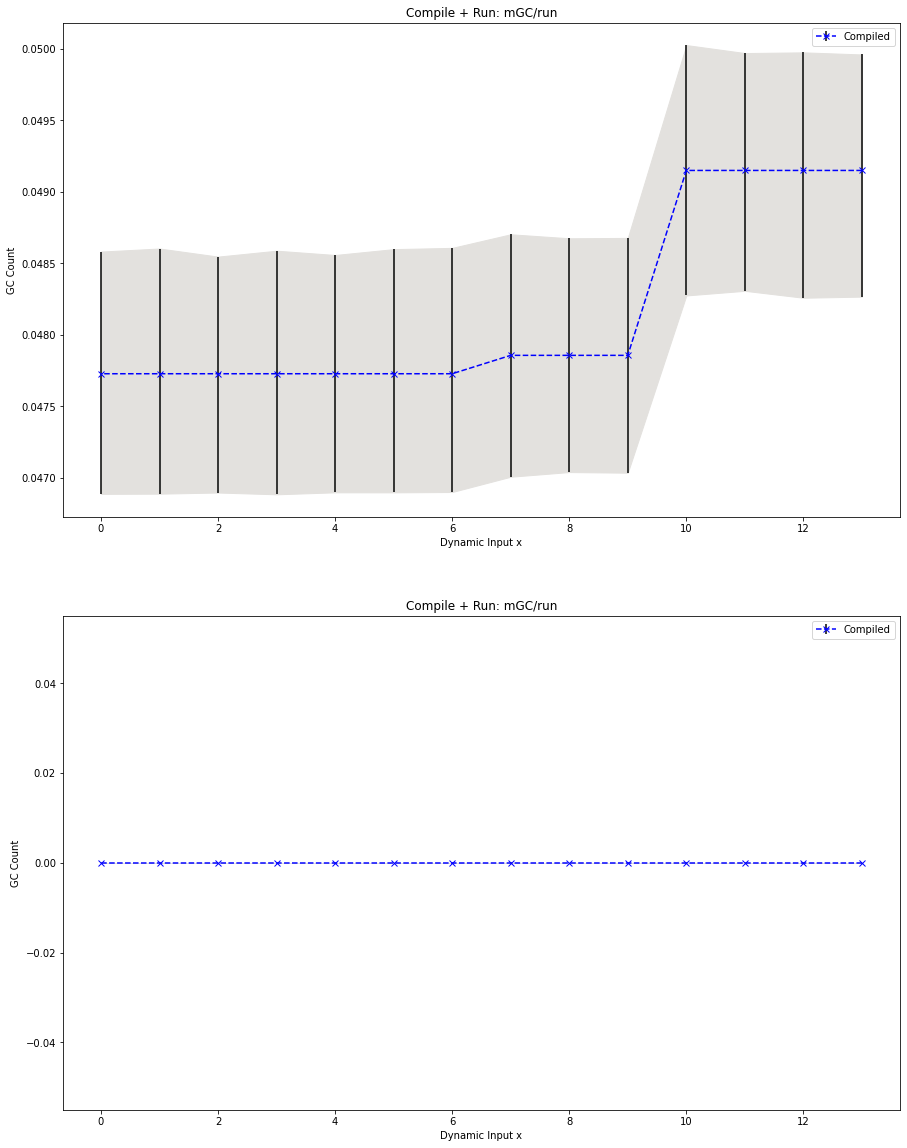

In [14]:
plot_gc(df)

## Pow List Map

In [15]:
# map 100 runs
df_list_map = pd.read_csv("../traces/benchmarks/2023_3_2_new_experiments_list_map.csv")

In [16]:
df_list_map

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,mjWd_per_run_mean,mjWd_per_run_abs_lo_diff,mjWd_per_run_abs_hi_diff,promotions_per_run_r2,promotions_per_run_mean,promotions_per_run_abs_lo_diff,promotions_per_run_abs_hi_diff,mGC_per_run_r2,mGC_per_run_mean,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
0,map_pow_10_1_run,0.991744,3.494808e+06,-9.337257e+04,9.284817e+04,1.0,826429.0,-1.164153e-09,1.513399e-09,0.999972,5.362178e+04,-155.912463,169.963675,0.995170,4.036780e+03,-158.462081,176.515844,0.998928,3.195556,-0.028889,0.035898,0.677778,0.093333,-0.015047,0.017002,NaN,0.000000,0.000000,0.000000
1,map_pow_10_1_staged,0.996446,4.006242e+06,-8.046785e+04,7.164140e+04,1.0,1013035.0,-1.280569e-09,1.862645e-09,0.999949,4.840801e+04,-174.755655,161.536164,0.994473,4.653007e+03,-172.325325,165.708743,0.998894,3.905556,-0.035808,0.035166,0.677778,0.093333,-0.014641,0.017346,NaN,0.000000,0.000000,0.000000
2,map_pow_10_2_run,0.994662,6.173211e+06,-9.665398e+04,1.341279e+05,1.0,1485201.0,-2.095476e-09,2.561137e-09,0.999981,9.342683e+04,-206.983294,209.255359,0.996809,7.155831e+03,-197.306737,204.676293,0.999401,5.758889,-0.032521,0.030202,0.757079,0.185556,-0.035287,0.035075,NaN,0.000000,0.000000,0.000000
3,map_pow_10_2_staged,0.996867,4.542300e+06,-6.063245e+04,6.644821e+04,1.0,1139953.0,-1.629815e-09,1.862645e-09,0.999976,5.651727e+04,-171.300726,147.206679,0.997522,5.520269e+03,-167.202165,153.361095,0.999650,4.403333,-0.020156,0.022635,0.662387,0.112222,-0.022905,0.025765,NaN,0.000000,0.000000,0.000000
4,map_pow_10_4_run,0.993260,1.177499e+07,-2.878113e+05,3.951754e+05,1.0,2817009.0,-4.190952e-09,4.656613e-09,0.999984,1.742954e+05,-409.611497,335.747081,0.997596,1.413635e+04,-419.398485,321.390379,0.999887,10.926667,-0.025631,0.029038,0.930836,0.364444,-0.019812,0.020441,NaN,0.000000,0.000000,0.000000
5,map_pow_10_4_staged,0.995854,5.753576e+06,-8.998982e+04,1.150337e+05,1.0,1408053.0,-1.862645e-09,2.561137e-09,0.999957,7.366627e+04,-236.098018,206.393911,0.996038,7.669271e+03,-238.458187,214.061216,0.999088,5.457778,-0.063352,0.053721,0.725610,0.166667,-0.040335,0.035417,NaN,0.000000,0.000000,0.000000
6,map_pow_10_8_run,0.999474,2.299655e+07,-1.633624e+05,1.470192e+05,1.0,5534061.0,-8.381903e-09,9.313226e-09,0.999996,3.475453e+05,-289.757448,388.741429,0.999443,2.882229e+04,-289.273750,375.464453,0.999964,21.513333,-0.034938,0.037832,0.977475,0.813333,-0.028668,0.032402,NaN,0.000000,0.000000,0.000000
7,map_pow_10_8_staged,0.996586,8.418060e+06,-1.628412e+05,1.783132e+05,1.0,1997690.0,-2.793968e-09,3.492460e-09,0.999975,1.187832e+05,-341.188866,355.427374,0.997533,1.199815e+04,-370.190497,362.850017,0.999723,7.768889,-0.037757,0.031111,0.865328,0.287778,-0.035160,0.032129,NaN,0.000000,0.000000,0.000000
8,map_pow_10_16_run,0.995257,4.810557e+07,-8.581057e+05,1.151307e+06,1.0,11182893.0,-1.676381e-08,1.862645e-08,0.999995,7.448262e+05,-925.123051,956.022744,0.999312,6.084923e+04,-907.859509,963.697852,0.999988,43.627778,-0.039450,0.045906,0.996215,1.936667,-0.029005,0.031873,NaN,0.000000,0.000000,0.000000
9,map_pow_10_16_staged,0.996414,1.488905e+07,-2.423388e+05,3.112634e+05,1.0,3391689.0,-5.122274e-09,5.587935e-09,0.999996,2.601712e+05,-269.560635,303.365515,0.999475,2.368419e+04,-283.624816,304.778672,0.999902,13.286667,-0.031537,0.031341,0.963545,0.693333,-0.041052,0.045583,NaN,0.000000,0.000000,0.000000


In [17]:
a = []
for l in [[2**i, 2**i] if i != 5 else [31, 31] for i in range(9)]:
    a += l
df_list_map['bench_x'] = a

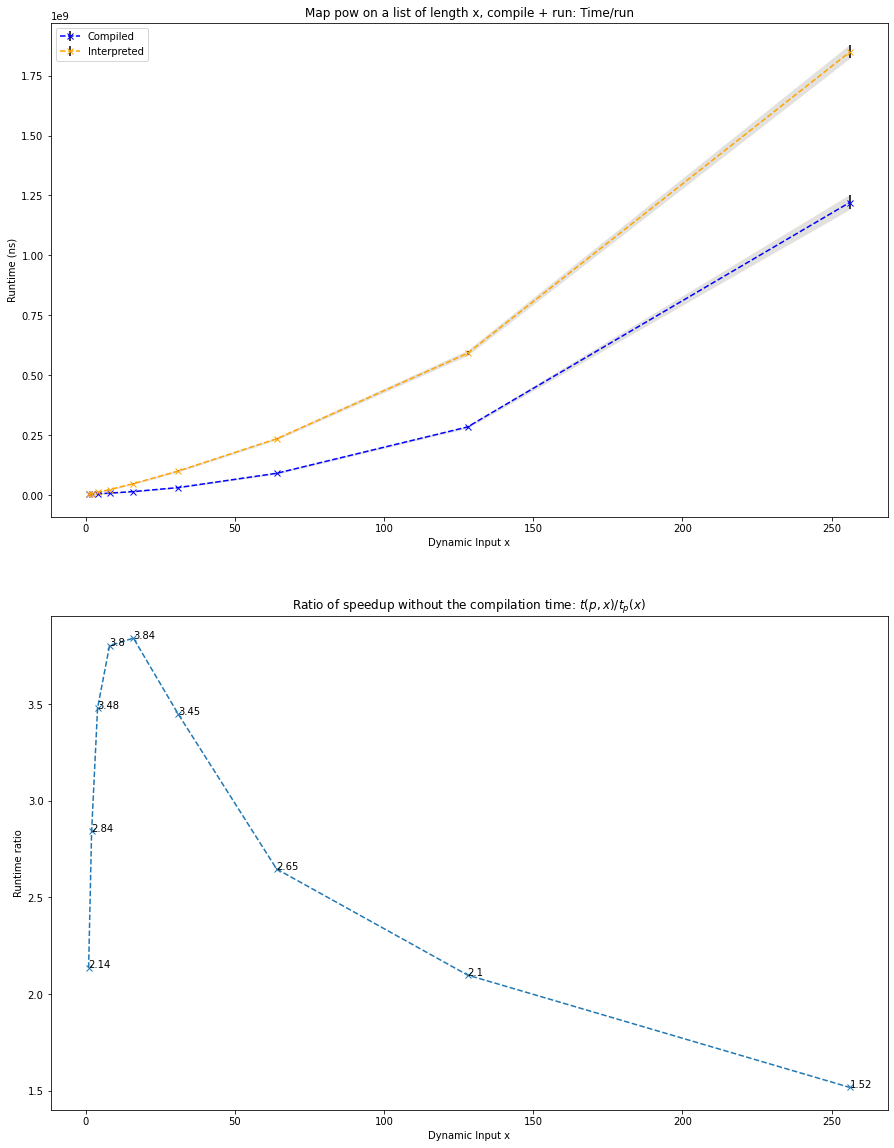

In [18]:
def plot_for(df):
    fig, axs = plt.subplots(2, 1, figsize=(15, 20))
    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input x")
    axs[0].set_ylabel("Runtime (ns)")
    # axs[0].set_yscale('log', nonposy='clip')
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title("Map pow on a list of length x, compile + run: Time/run")

    # pow10 compile time 2.369822e+06	-150726.975394	150175.942413: info from prev experiments
    staged['time_per_run_mean'] -= 2.369822e+06
    staged['time_per_run_abs_lo_diff'] += -150726.975394
    staged['time_per_run_abs_hi_diff'] += 150175.942413

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input x")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(f"Ratio of speedup without the compilation time: $t(p, x)/t_p(x)$")
    plt.show()

plot_for(df_list_map)

In [19]:
staged['time_per_run_mean']

NameError: name 'staged' is not defined

## Pow map bis

In [24]:
# List map 400 runs
df_list_map = pd.read_csv("../traces/benchmarks/2023_3_2_new_experiments_list_map_2_and_while.csv")
df_list_map = df_list_map[df_list_map['benchmark_name'].str.startswith('map_pow')]

In [25]:
a = []
for l in [[2**i, 2**i] if i != 5 else [31, 31] for i in range(9)]:
    a += l
df_list_map['bench_x'] = a

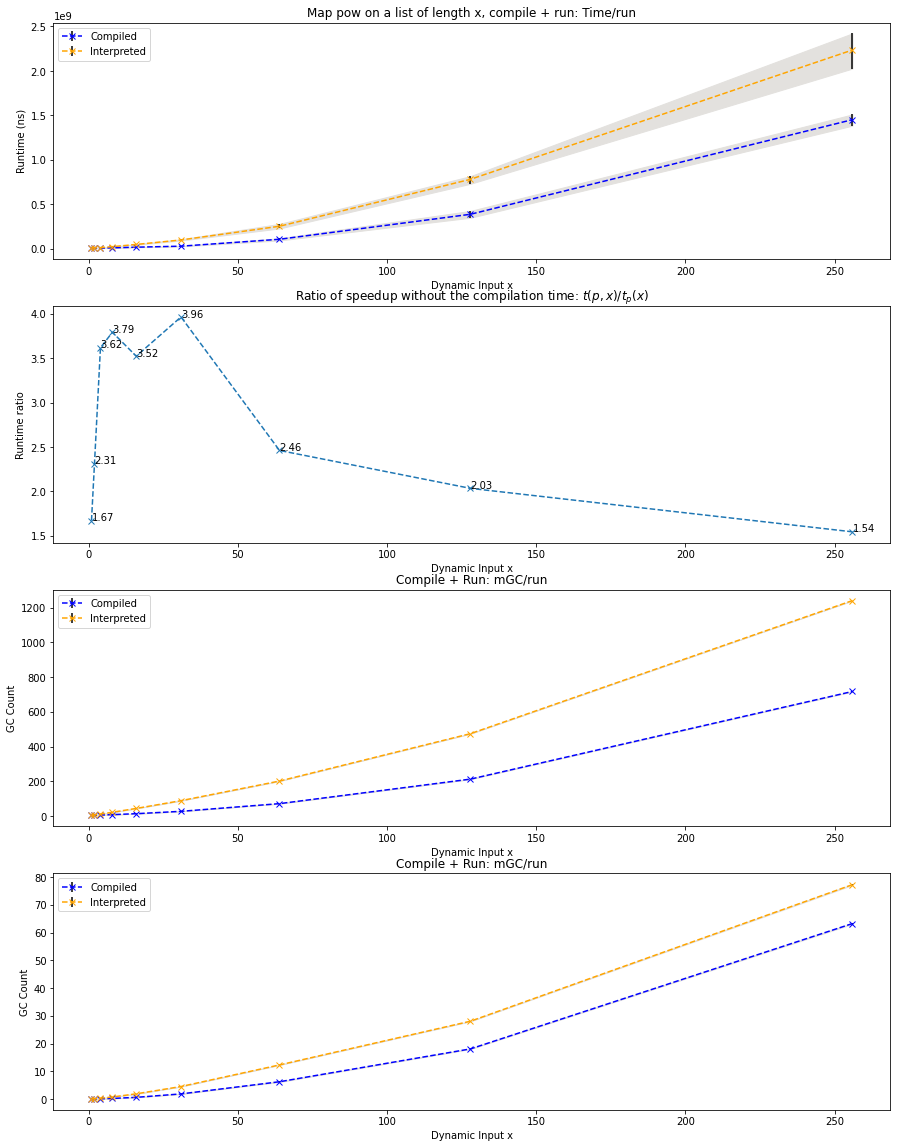

In [26]:
def plot_for(df):
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff', 'mGC_per_run_mean', 'mGC_per_run_abs_lo_diff', 'mGC_per_run_abs_hi_diff', 'mjGC_per_run_mean', 'mjGC_per_run_abs_lo_diff', 'mjGC_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff', 'mGC_per_run_mean', 'mGC_per_run_abs_lo_diff', 'mGC_per_run_abs_hi_diff', 'mjGC_per_run_mean', 'mjGC_per_run_abs_lo_diff', 'mjGC_per_run_abs_hi_diff']]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input x")
    axs[0].set_ylabel("Runtime (ns)")
    # axs[0].set_yscale('log', nonposy='clip')
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title("Map pow on a list of length x, compile + run: Time/run")

    # pow10 compile time 2.369822e+06	-150726.975394	150175.942413: info from prev experiments
    staged['time_per_run_mean'] -= 2.369822e+06
    staged['time_per_run_abs_lo_diff'] += -150726.975394
    staged['time_per_run_abs_hi_diff'] += 150175.942413

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input x")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(f"Ratio of speedup without the compilation time: $t(p, x)/t_p(x)$")

    # Garbage collection

    plot_one(axs[2], staged, "blue", "black", "#e3e1de", "Compiled", metric="mGC_per_run")
    plot_one(axs[2], run, "orange", "black", "#e3e1de", "Interpreted", metric="mGC_per_run")
    axs[2].legend()
    axs[2].set_xlabel("Dynamic Input x")
    axs[2].set_ylabel("GC Count")
    # axs[0].set_yscale('log', nonposy='clip')
    axs[2].set_title("Compile + Run: mGC/run")

    plot_one(axs[3], staged, "blue", "black", "#e3e1de", "Compiled", metric="mjGC_per_run")
    plot_one(axs[3], run, "orange", "black", "#e3e1de", "Interpreted", metric="mjGC_per_run")
    axs[3].legend()
    axs[3].set_xlabel("Dynamic Input x")
    axs[3].set_ylabel("GC Count")
    # axs[0].set_yscale('log', nonposy='clip')
    axs[3].set_title("Compile + Run: mGC/run")

    plt.show()

plot_for(df_list_map)

In [27]:
df_list_map

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,mjWd_per_run_mean,mjWd_per_run_abs_lo_diff,mjWd_per_run_abs_hi_diff,promotions_per_run_r2,promotions_per_run_mean,promotions_per_run_abs_lo_diff,promotions_per_run_abs_hi_diff,mGC_per_run_r2,mGC_per_run_mean,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
0,map_pow_10_1_run,0.905685,4.245096e+06,-3.726034e+05,3.454529e+05,1.0,826428.0,-2.328306e-10,2.211891e-09,0.999979,5.350082e+04,-86.484234,105.840833,0.996130,3.915823e+03,-88.580232,110.384962,0.999140,3.205058,-0.025418,0.022963,0.746574,0.097665,-0.015532,0.015022,NaN,0.000000,0.000000,0.000000,1
1,map_pow_10_1_staged,0.844882,4.911442e+06,-7.321107e+05,6.268342e+05,1.0,1013034.0,-3.492460e-10,2.677552e-09,0.999967,4.836424e+04,-130.502679,134.841637,0.996415,4.609244e+03,-130.457815,130.697194,0.999478,3.908171,-0.019332,0.019649,0.607966,0.092218,-0.019161,0.019673,NaN,0.000000,0.000000,0.000000,1
2,map_pow_10_2_run,0.925363,8.300315e+06,-4.532714e+05,5.319621e+05,1.0,1485202.0,-6.984919e-10,3.492460e-09,0.999966,9.350243e+04,-287.181918,274.630276,0.994388,7.231431e+03,-283.892244,277.004684,0.999791,5.752529,-0.014468,0.016890,0.900857,0.177043,-0.012767,0.014649,NaN,0.000000,0.000000,0.000000,2
3,map_pow_10_2_staged,0.715304,5.961975e+06,-1.056475e+06,1.129894e+06,1.0,1139954.0,-4.656613e-10,3.026798e-09,0.999983,5.657069e+04,-98.072202,107.726570,0.998224,5.573690e+03,-101.365310,108.447102,0.999845,4.408560,-0.011448,0.010971,0.832293,0.116732,-0.010951,0.010989,NaN,0.000000,0.000000,0.000000,2
4,map_pow_10_4_run,0.918193,1.051048e+07,-7.973944e+05,1.116887e+06,1.0,2817008.0,-1.396984e-09,6.984919e-09,0.999993,1.743015e+05,-276.844971,228.616514,0.998898,1.414251e+04,-264.229837,247.509304,0.999954,10.928016,-0.014242,0.013865,0.978948,0.368482,-0.013380,0.011241,NaN,0.000000,0.000000,0.000000,4
5,map_pow_10_4_staged,0.695931,5.275156e+06,-4.312279e+05,6.498056e+05,1.0,1408052.0,-6.984919e-10,3.492460e-09,0.999985,7.363139e+04,-105.855192,107.914573,0.998564,7.634391e+03,-111.156620,109.500210,0.999763,5.456809,-0.022163,0.023864,0.854181,0.172374,-0.021250,0.020829,NaN,0.000000,0.000000,0.000000,4
6,map_pow_10_8_run,0.908976,2.156870e+07,-1.775676e+06,1.804200e+06,1.0,5534061.0,-1.862645e-09,1.396984e-08,0.999995,3.474597e+05,-327.490919,320.842213,0.999333,2.873667e+04,-322.295005,327.437631,0.999990,21.523735,-0.012367,0.012527,0.990463,0.821790,-0.019049,0.019045,NaN,0.000000,0.000000,0.000000,8
7,map_pow_10_8_staged,0.898304,8.058240e+06,-7.001400e+05,8.461099e+05,1.0,1997690.0,-4.656613e-10,5.355105e-09,0.999987,1.188423e+05,-167.543598,147.285096,0.998771,1.205726e+04,-181.206709,145.722177,0.999908,7.768872,-0.014663,0.012608,0.956315,0.293385,-0.014315,0.013886,NaN,0.000000,0.000000,0.000000,8
8,map_pow_10_16_run,0.934404,4.620393e+07,-3.211247e+06,3.017268e+06,1.0,11182860.0,-3.725290e-09,2.793968e-08,0.999997,7.458708e+05,-422.735084,512.019861,0.999631,6.189483e+04,-432.424716,530.631364,0.999996,43.638132,-0.019620,0.020247,0.998092,1.955642,-0.021084,0.020286,NaN,0.000000,0.000000,0.000000,16
9,map_pow_10_16_staged,0.935198,1.548662e+07,-1.103672e+06,1.049437e+06,1.0,3391656.0,-9.313226e-10,8.847564e-09,0.999998,2.602233e+05,-144.419334,136.661248,0.999728,2.373729e+04,-150.309391,136.829709,0.999956,13.283658,-0.022455,0.017918,0.987472,0.694553,-0.015823,0.015877,NaN,0.000000,0.000000,0.000000,16
